In [3]:
# importation of python libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# importing csv file
df = pd.read_csv(r"D:\Super_Store_Sales_Analysis\SuperstoreData.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# calculating number of null values in column postal code 

null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [9]:
# filling 0 to empty column
df.fillna({"Postal Code": 0}, inplace=True)

# changing datatype from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Checking for duplicates

In [11]:
# using conditional statement
if df.duplicated().sum() > 0:  
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [12]:
# another method to check for duplicates
df.duplicated(keep=False).sum()

0

# Exploratory Data Analysis

### Customer Analysis

In [13]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### Customer Segmentation

Group customers based on segments

In [16]:
# Types of customer
type_of_customers = df['Segment'].unique()
print(type_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [20]:
# Number of customers in each segment 

customer_segmentation = df['Segment'].value_counts().reset_index() 
customer_segmentation = customer_segmentation.rename(columns={'Segment': 'Customer Type', 'count': 'Total Customers'})

# customer_segmentation = df['Segment'].value_counts().reset_index().rename(columns={'index': 'Customer Type', 'Segment': 'Total Customers'})

print(customer_segmentation)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


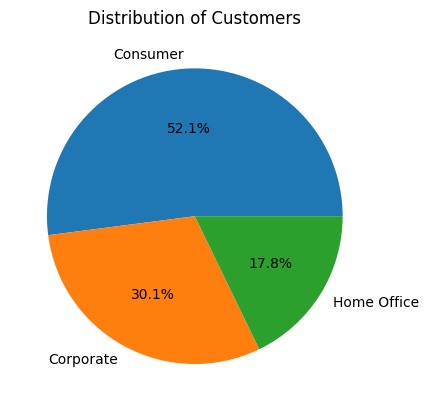

In [22]:
# Plotting a pie chart 
plt.pie(customer_segmentation['Total Customers'], labels=customer_segmentation['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Customers')
plt.show()

In [23]:
# Customers and Sales 

# Group the data by the "Segment" column and calculate the total sales for each segment

sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})

print(sales_per_segment)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


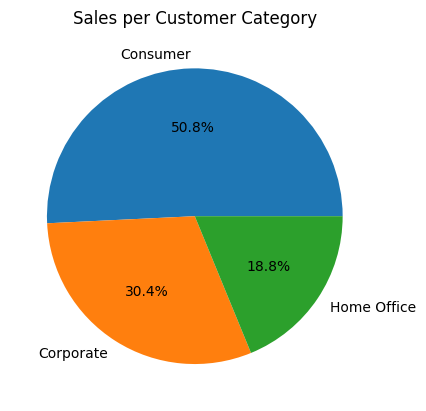

In [25]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Sales per Customer Category')
plt.show()

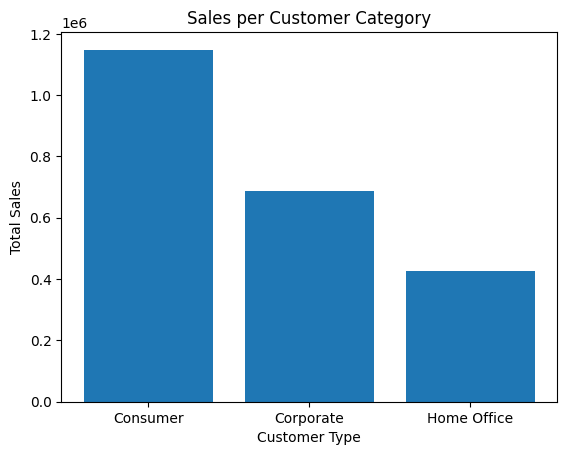

In [24]:
# Ploting a bar graph

plt.bar(sales_per_segment['Customer Type'], sales_per_segment['Total Sales'])

# Labels
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

### Customer Loyalty

Examine the repeat purchase behavior of customers

In [30]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] > 1]

# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Print the result- the first 10 and reset index
print(repeat_customers_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


### Sales by Customer

Identify top-spending customers based on their total purchase amount

In [29]:
# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


### Shipping Analysis

In [31]:
# Types of Shipping methods 

types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [34]:
# Frequency of different modes of shipment

shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'count':'Frequency', 'Ship Mode': 'Mode_of_Shipment'})

print(shipping_model)

  Mode_of_Shipment  Frequency
0   Standard Class       5859
1     Second Class       1902
2      First Class       1501
3         Same Day        538


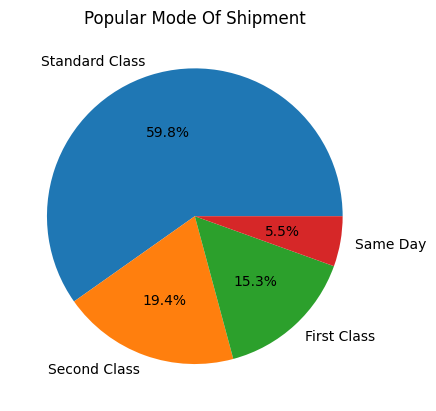

In [36]:
# Plotting a Pie chart

plt.pie(shipping_model['Frequency'], labels=shipping_model['Mode_of_Shipment'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Popular Mode Of Shipment')
plt.show()

### Geographical Analysis

In [6]:
# Customers per state 

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'Number_of_customers':'State', 'count':'Number_of_customers'})

print(state.head(20))

             State  Number_of_customers
0       California                 1946
1         New York                 1097
2            Texas                  973
3     Pennsylvania                  582
4       Washington                  504
5         Illinois                  483
6             Ohio                  454
7          Florida                  373
8         Michigan                  253
9   North Carolina                  247
10        Virginia                  224
11         Arizona                  223
12       Tennessee                  183
13        Colorado                  179
14         Georgia                  177
15        Kentucky                  137
16         Indiana                  135
17   Massachusetts                  135
18          Oregon                  122
19      New Jersey                  122


In [8]:
# Customers per city 

city = df['City'].value_counts().reset_index()
city= city.rename(columns={'count':'Number_of_customers'})

print(city.head(15))

             City  Number_of_customers
0   New York City                  891
1     Los Angeles                  728
2    Philadelphia                  532
3   San Francisco                  500
4         Seattle                  426
5         Houston                  374
6         Chicago                  308
7        Columbus                  221
8       San Diego                  170
9     Springfield                  161
10         Dallas                  156
11   Jacksonville                  125
12        Detroit                  115
13         Newark                   92
14        Jackson                   82


In [9]:
# Sales per state 

# Group the data by state and calculate the total purchases (sales) for each state
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = state_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_sales.head(20).reset_index(drop=True))

             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500


In [13]:
# Sales per city

# Group the data by cities and calculate the total purchase (sales) for each city
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sort the cities based on their sales in descending order to identify top cities
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Print the cities
print(top_city_sales.head(20).reset_index(drop=True))

             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482


In [14]:
# Group the data by states and cities and calculate the total purchase (sales) for each combination
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index()

# Sort the states and cities based on their sales in descending order to identify top combinations
top_state_city_sales = state_city_sales.sort_values(by='Sales', ascending=False)

print(top_state_city_sales.head(20).reset_index(drop=True))

           State           City        Sales
0       New York  New York City  252462.5470
1     California    Los Angeles  173420.1810
2     Washington        Seattle  116106.3220
3     California  San Francisco  109041.1200
4   Pennsylvania   Philadelphia  108841.7490
5          Texas        Houston   63956.1428
6       Illinois        Chicago   47820.1330
7     California      San Diego   47521.0290
8       Michigan        Detroit   42446.9440
9        Florida   Jacksonville   39133.3280
10         Texas    San Antonio   21843.5280
11      Delaware         Newark   20319.9800
12         Texas         Dallas   20127.9482
13       Indiana      Lafayette   19624.5100
14       Georgia        Atlanta   17197.8400
15     Minnesota    Minneapolis   16870.5400
16      Virginia    Springfield   16628.5300
17  Rhode Island     Providence   15980.6500
18          Ohio       Columbus   15900.7930
19      Kentucky      Henderson   15661.0100


### Product Analysis

Investigate the sales performance of different product

In [15]:
# Types of products in the Stores 

products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [16]:
# Types of products sub-category in the Stores 

product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [17]:
# Number of sub-categories

num_product_subcategory = df['Sub-Category'].nunique()
print(num_product_subcategory)

17


In [18]:
# Group the data by product category and how many sub-category it has 
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
# sort by descending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [19]:
# Group the data by product category versus the sales from each product category 
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='Sales', ascending=False) 
 
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


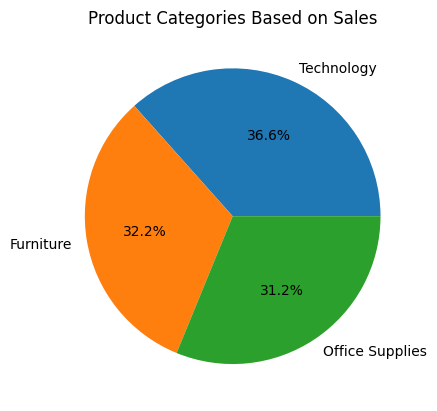

In [20]:
# Plotting a pie chart 
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

# set the title of the pie chart 
plt.title('Product Categories Based on Sales')
        
plt.show()

In [21]:
# Group the data by product sub category versus the sales  
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product sub-category in their descending order and identify top product sub-category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False) 

print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


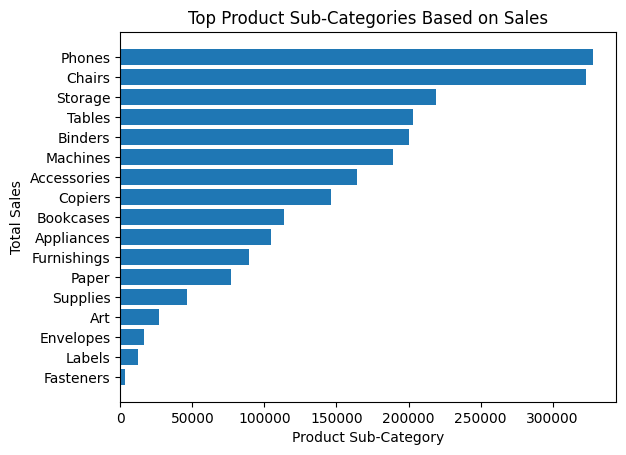

In [22]:
top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Sub-Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()

### Sales

In [23]:
# Convert the "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


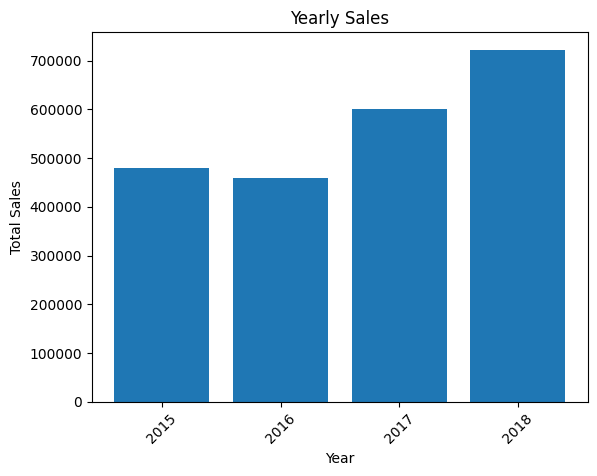

In [28]:
# Create a bar graph for total sales by year
years = yearly_sales['Year']
sales = yearly_sales['Total Sales']

# Plotting the bar graph
plt.bar(years, sales)

# Setting tick locations and labels for x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_xticks(years)  # Set tick locations
plt.gca().set_xticklabels([int(year) for year in years])  # Set tick labels

# Labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

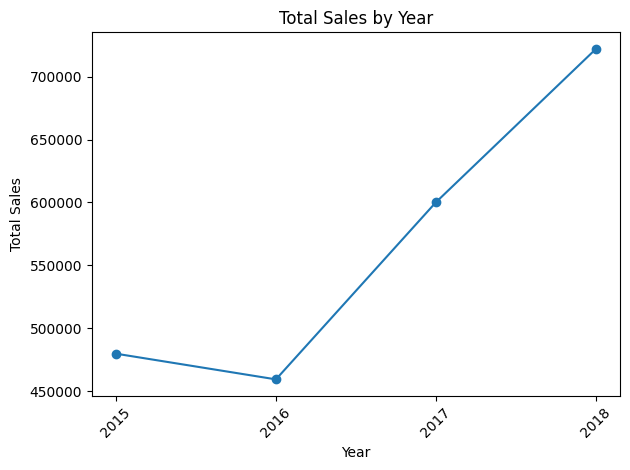

In [29]:
# Create a line graph for total sales by year
years = yearly_sales['Year']
sales = yearly_sales['Total Sales']

# Plotting the line graph
plt.plot(years, sales, marker='o', linestyle='-')

# Setting tick locations and labels for x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_xticks(years)  # Set tick locations
plt.gca().set_xticklabels([int(year) for year in years])  # Set tick labels

# Labels
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the quarterly sales for 2018
quarterly_sales = year_sales.resample('QE', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2018:")
print(quarterly_sales)

Quarterly Sales for 2018:
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


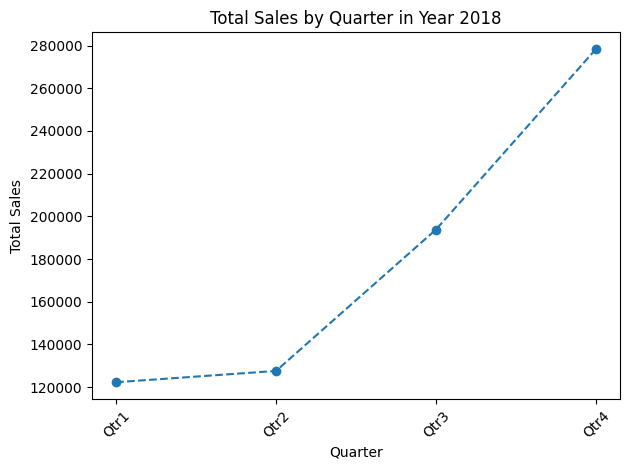

In [37]:
quarters = quarterly_sales['Quarter']
sales = quarterly_sales['Total Sales']

# Define quarter labels
quarter_labels = ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']

# Plotting the line graph
plt.plot(range(1, len(quarters) + 1), sales, marker='o', linestyle='--')

# Labels
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter in Year 2018')

# Setting tick locations and labels for x-axis
plt.xticks(range(1, len(quarters) + 1), quarter_labels, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('ME', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2018
print("Monthly Sales for 2018:")
print(monthly_sales)

Monthly Sales for 2018:
        Month  Total Montly Sales
0  2018-01-31          43476.4740
1  2018-02-28          19920.9974
2  2018-03-31          58863.4128
3  2018-04-30          35541.9101
4  2018-05-31          43825.9822
5  2018-06-30          48190.7277
6  2018-07-31          44825.1040
7  2018-08-31          62837.8480
8  2018-09-30          86152.8880
9  2018-10-31          77448.1312
10 2018-11-30         117938.1550
11 2018-12-31          83030.3888


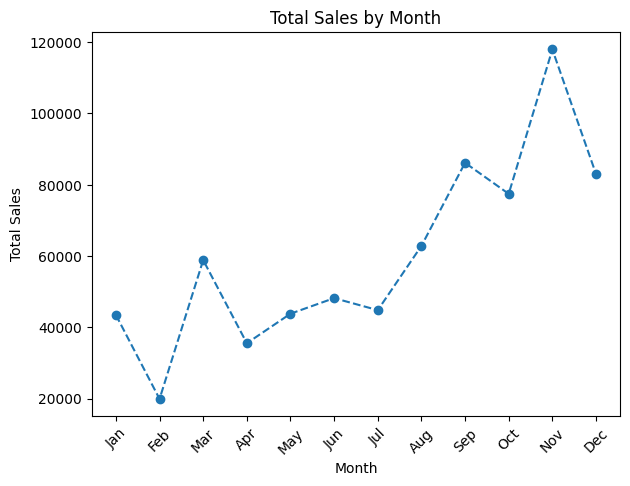

In [40]:
months = monthly_sales['Month']
sales = monthly_sales['Total Montly Sales']

# Extracting month names
month_names = months.dt.strftime('%b')  # Abbreviated month names

# Plotting the line graph
plt.plot(month_names, sales, marker='o', linestyle='--')

# Labels
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

### Sales Trend

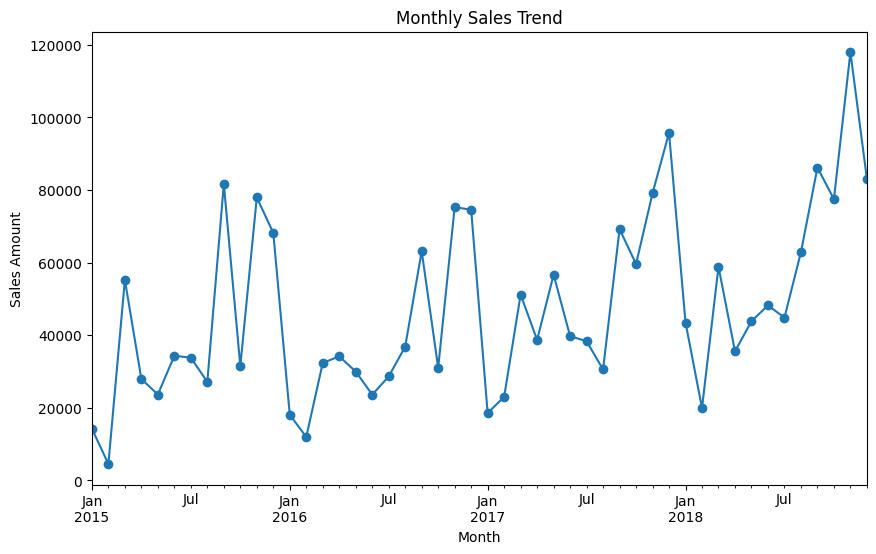

In [42]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(10, 20))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

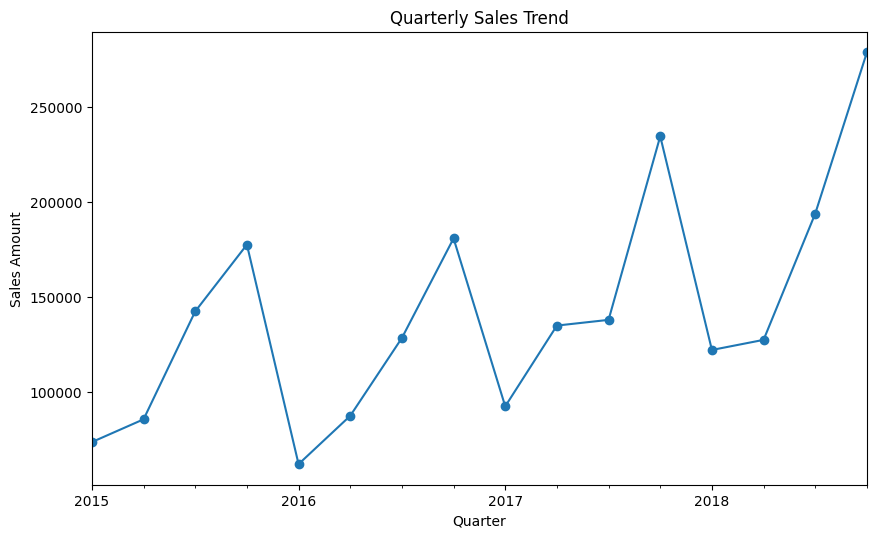

In [43]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for quarters
plt.figure(figsize=(10, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

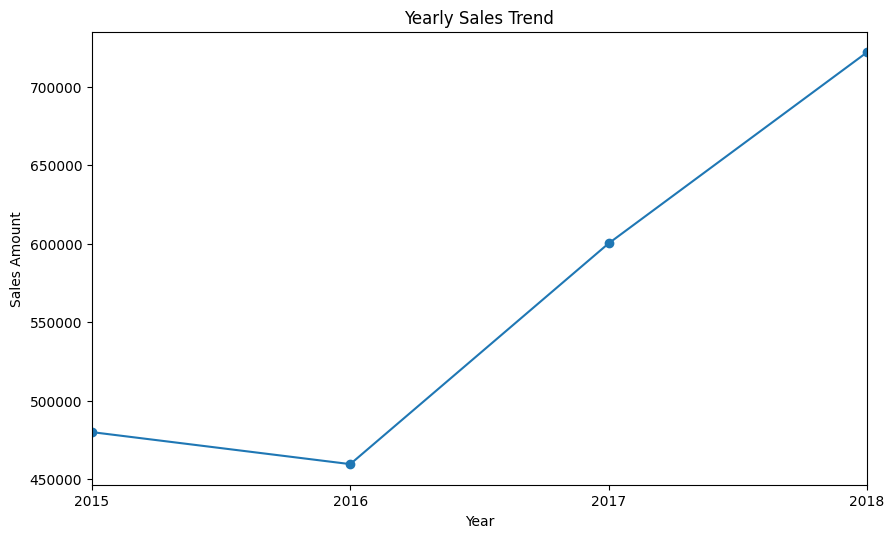

In [44]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

# Plot the sales trends for years
plt.figure(figsize=(10, 20))

# Yearly Sales Trend
plt.subplot(3, 1, 3)
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots

plt.show()